In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("datasets/attrib_data.csv")

In [5]:
df.groupby('signup')['signup'].count()

signup
0    780
1    420
Name: signup, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# create design matrix X and target vector y
X = df[['phone','email','webinar']]
y = df[['signup']]

scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=['phone', 'email', 'webinar'])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)
print("Shape of X Train: " +str(X_train.shape))
print("Shape of X Test: " +str(X_test.shape))
print("Shape of Y Train: " +str(X_test.shape))
print("Shape of Y Test: " + str(y_test.shape))
X_train.head()

Shape of X Train: (804, 3)
Shape of X Test: (396, 3)
Shape of Y Train: (396, 3)
Shape of Y Test: (396, 1)


,phone,email,webinar
359,-1.001668,-0.968819,-0.981832
422,-1.001668,1.032184,1.018505
678,0.998335,1.032184,1.018505
526,0.998335,1.032184,1.018505
477,0.998335,-0.968819,1.018505


In [10]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.689473
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.068   
Dependent Variable: signup           AIC:              1114.6731
Date:               2018-12-24 22:26 BIC:              1128.7419
No. Observations:   804              Log-Likelihood:   -554.34  
Df Model:           2                LL-Null:          -519.05  
Df Residuals:       801              LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
phone     -0.1255     0.0708   -1.7713   0.0765   -0.2643   0.0134
email     -0.0483     0.0709   -0.6808   0.4960   -0.1873   0.0907
web

In [11]:
from sklearn.metrics import roc_auc_score
# Create, output AUC
predicted = result.predict(X_test)
auc = roc_auc_score(y_true=y_test, y_score=predicted)
print('AUC for 20%% holdout: %s' %auc)


AUC for 20% holdout: 0.5157975246836323


In [12]:
## Running into issues with Scikit
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
print(cls.coef_)

[[-0.12581728 -0.07808225  0.09080167]]


AUC for 20% holdout: 0.5
0.6439393939393939
[[255   0]
 [141   0]]


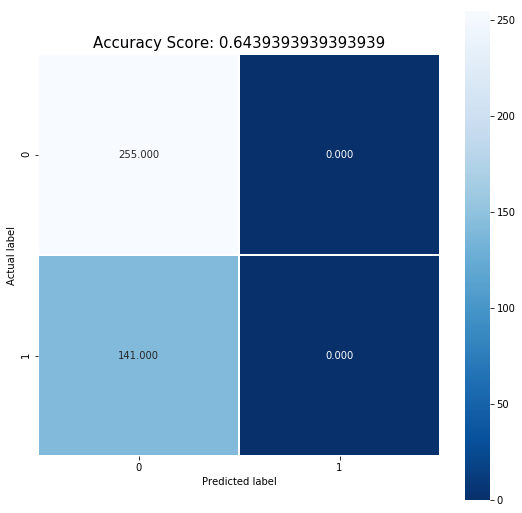

In [21]:
from sklearn.metrics import roc_auc_score
# Create, output AUC
predicted = cls.predict(X_test)
auc = roc_auc_score(y_true=y_test, y_score=predicted)
print('AUC for 20%% holdout: %s' %auc)

score = cls.score(X_test, y_test)
print(score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);